In [1]:
from matplotlib import pyplot as plt
from imutils.object_detection import non_max_suppression
import imutils
import numpy as np
import cv2

In [2]:
# Download some images containing people
!wget 'https://www.wsha.org/wp-content/uploads/banner-diverse-group-of-people-2.jpg'

--2022-01-21 11:16:45--  https://www.wsha.org/wp-content/uploads/banner-diverse-group-of-people-2.jpg
Resolving www.wsha.org (www.wsha.org)... 104.198.7.33
Connecting to www.wsha.org (www.wsha.org)|104.198.7.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1923610 (1.8M) [image/jpeg]
Saving to: ‘banner-diverse-group-of-people-2.jpg’

banner-diverse-grou 100%[===================>]   1.83M  67.6KB/s    in 24s     

2022-01-21 11:17:15 (76.9 KB/s) - ‘banner-diverse-group-of-people-2.jpg’ saved [1923610/1923610]



In [61]:
image = cv2.imread('images/banner-diverse-group-of-people-2.jpg')

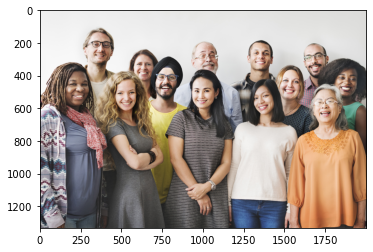

In [62]:
plt.imshow(image[:,:,::-1])

In [52]:
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

In [72]:
r,w = hog.detectMultiScale(image,winStride=(1,1), padding=(1,1), scale=1.2)

In [73]:
r

array([[1176,  407,  160,  321],
       [1367,  727,  191,  382],
       [ 476,  137,  310,  619],
       [ 256,  403,  330,  660],
       [ 907,  165,  135,  268],
       [1564,  771,  159,  319],
       [1472,  664,  112,  224],
       [1139,  724,  133,  265],
       [1762,  818,   89,  179],
       [ 376,  181,   77,  154]], dtype=int32)

In [74]:
rects = np.array([(x, y, x+w, y+r) for (x, y, w, r) in r])
rects

array([[1176,  407, 1336,  728],
       [1367,  727, 1558, 1109],
       [ 476,  137,  786,  756],
       [ 256,  403,  586, 1063],
       [ 907,  165, 1042,  433],
       [1564,  771, 1723, 1090],
       [1472,  664, 1584,  888],
       [1139,  724, 1272,  989],
       [1762,  818, 1851,  997],
       [ 376,  181,  453,  335]], dtype=int32)

In [87]:
# Perform Non-max suppression
rects_NMS = non_max_suppression(rects, probs=None, overlapThresh=.2)
rects_NMS

array([[1367,  727, 1558, 1109],
       [1564,  771, 1723, 1090],
       [ 256,  403,  586, 1063],
       [1762,  818, 1851,  997],
       [1139,  724, 1272,  989],
       [1176,  407, 1336,  728],
       [ 907,  165, 1042,  433],
       [ 376,  181,  453,  335]])

In [76]:
for  (x1, y1, x2, y2) in rects_NMS:
    cv2.rectangle(image, (x1, y1), (x2, y2), (0,0,255), 3)

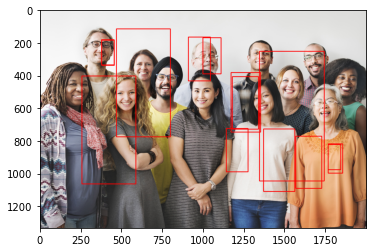

In [77]:
plt.imshow(image[:,:,::-1])

In [80]:
import matplotlib.pyplot as plt
from imutils.object_detection import non_max_suppression
import numpy as np

In [78]:
# Lets try doing this again using a completely different image
# Download new image
!wget 'https://www.finra.org/sites/default/files/Fin_Pro_0.png'

--2022-01-21 12:59:46--  https://www.finra.org/sites/default/files/Fin_Pro_0.png
Resolving www.finra.org (www.finra.org)... 104.18.1.70, 104.18.0.70
Connecting to www.finra.org (www.finra.org)|104.18.1.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 585153 (571K) [image/png]
Saving to: ‘Fin_Pro_0.png’

Fin_Pro_0.png       100%[===================>] 571.44K  41.5KB/s    in 14s     

2022-01-21 13:00:04 (41.5 KB/s) - ‘Fin_Pro_0.png’ saved [585153/585153]



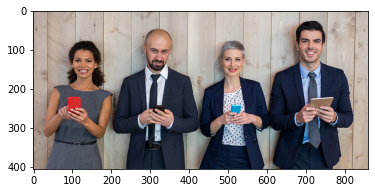

In [81]:
img = cv2.imread('images/Fin_Pro_0.png')
plt.imshow(img[:,:,::-1])

In [84]:
hog = cv2.HOGDescriptor()
hog.setSVMDetector(hog.getDefaultPeopleDetector())

In [133]:
r,c = hog.detectMultiScale(img, padding=(1,1), winStride=(1,1), scale=1.2)

In [134]:
r

array([[ 74,  63,  77, 154],
       [629, 174,  77, 154],
       [465,  68,  64, 128]], dtype=int32)

In [136]:
rect = np.array([(x1,y1,x2+c,y2+r) for (x,y,r,c) in  r])

rects_NMS = non_max_suppression(rect, probs=None, overlapThresh=0.4)

In [137]:
for (x1, y1, x2, y2) in rects_NMS:
    cv2.rectangle(img, (x1,y1), (x2,y2), (0,0,255),2)

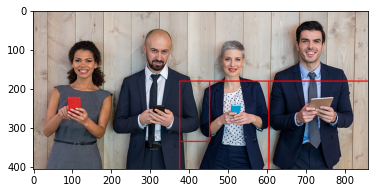

In [138]:
plt.imshow(img[:,:,::-1])

These outputs were horrible! 😮‍💨

## Face Detection (YOLO Detector)

In [140]:
! pip3 install cvlib

     |████████████████████████████████| 10.0 MB 23 kB/s 
  Created wheel for cvlib: filename=cvlib-0.2.6-py3-none-any.whl size=10044621 sha256=6bcd75e499f529f477ac8b7dac012412247a21e10f4488c228efaa2c443d27d2
  Stored in directory: /Users/cosmoremit/Library/Caches/pip/wheels/ab/cb/f5/2d027cae91342418d4a84c6955d080c2e361b60bb72db3f71c
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12075 sha256=840da9360a66cfa6d22a8a9d7facd76d6c78936379876321d7dbe0584ddda2c5
  Stored in directory: /Users/cosmoremit/Library/Caches/pip/wheels/2c/67/ed/d84123843c937d7e7f5ba88a270d11036473144143355e2747
Successfully built cvlib progressbar


In [145]:
! pip3 install tensorflow

  Using cached tensorflow-2.7.0-cp38-cp38-macosx_10_11_x86_64.whl (207.1 MB)
  Using cached tensorflow_io_gcs_filesystem-0.23.1-cp38-cp38-macosx_10_14_x86_64.whl (1.6 MB)
     |███▌                            | 1.4 MB 6.3 kB/s eta 0:28:49ERROR: Exception:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/pip/_vendor/resolvelib/resolvers.py", line 171, in _merge_into_criterion
    crit = self.state.criteria[name]
KeyError: 'libclang'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/pip/_vendor/urllib3/response.py", line 438, in _error_catcher
    yield
  File "/opt/anaconda3/lib/python3.8/site-packages/pip/_vendor/urllib3/response.py", line 519, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "/opt/anaconda3/lib/python3.8/site-packages/pip/_vendor/cachecontrol/filewrapper.py", line 62, in read
    data = self.__fp.read(amt)

In [141]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import cvlib
from cvlib.object_detection import draw_bbox

ModuleNotFoundError: No module named 'tensorflow'